


##### https://kutar37.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81Collaborative-Filtering-%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-1 

위의 블로그를 참조 하여 공부한 자료입니다.

#### 협업필터링?  
        :  사용자들의 정보를 가지고 사용자의 관심사를 예측하는 방법이다.
           넷플릭스에서 쓰이는 방법으로 두사람간 유사도를 구해 예상 평점을 구하고 비슷한 영화를 추천해주는 알고리즘으로 쓰인다.
           
           
           
######  협업 필터링 종류
    * 유저기반    ->  자신과 취향이 비슷한 유저가 어떤것을 구매,시청 했는지를 기반으로 하는 방법.
    * 아이템기반  ->  자신이 구매했던 항목을 기반으로 연관성 있는 것을 추천하는 기법.
    
                   

In [32]:
movie = { 
    "김재석":{"곡성":5,"사바하":4,"리얼":1},
    "로제"  :{"곡성":2.5,"사바하":2,"리얼":2},
    "박보검":{"사바하":4,"리얼":1},
    "노홍철":{"곡성":3.5,"사바하":4,"리얼":5}
}


##### vlaue값 가져오기

In [33]:
movie.get("박보검").get("사바하")

4

#####  2차원에서 피타고라스 공식을 통해 두 사람간 거리를 이용하여 거리가 가까울 수록 유사도가 높다 고 판단한다.

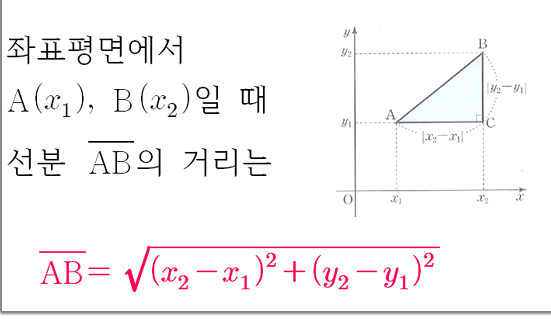

In [34]:
from math import sqrt

###### 밑변^2 * 높이^2 = 빗변 == 거리 구하기

In [35]:
def analogous(x, y):
    return sqrt(pow(x, 2)+pow(y, 2))

###### 거리를 구하기 위한 높이와 밑변 구한 후 거리 구하기

In [36]:
x = movie['노홍철']['사바하'] -  movie['박보검']['사바하']
y = movie['노홍철']['리얼'] - movie["박보검"]["리얼"]

analogous(x, y)

4.0

값이 작을수록 유사하다는 의미이다.

In [37]:
for i in movie:
    if i != '박보검':
        x = movie.get("박보검").get('사바하') - movie.get(i).get("사바하")
        y = movie.get("박보검").get("리얼") - movie.get(i).get("리얼")
        print(i," : ",analogous(x, y))

        

김재석  :  0.0
로제  :  2.23606797749979
노홍철  :  4.0


###### 비교를 위한 정규화
 값이 큰값이 더 유사한것 처럼 변경한다.
 
 범위를  0 ~ 1 사이로 정의 한다.
 공식 : 
 
     Xnew =  X - X min / Xmax - Xmin
 
 

In [38]:
for i in movie:
    if i != '박보검':
        x = movie.get("박보검").get('사바하') - movie.get(i).get("사바하")
        y = movie.get("박보검").get("리얼") - movie.get(i).get("리얼")
        print(i," : ",1/(1+analogous(x, y)))


김재석  :  1.0
로제  :  0.3090169943749474
노홍철  :  0.2


###### 피타고라스를 이용해서는 비교 대사이 2개로 한정 되어있다.
###### 다차원에서의 거리를 구해 비교대상이 몇 개 늘어나듣 하나의 함수로 비교할 수 있어야 한다.



다차원간 거리를 구하는 데 사용되는 공식:

* Euclidean distance

    (1) 두 사용자의 선호가 겹쳐지는 아이템의 숫자를 고려하지 않기 때문에 추천엔진을 사용할 때 약점이 될 수 있다.

    (2) 만약 두 사용자의 아이템 선호 중 단지 하나만 겹친다면 계산 방식을 어떻게 정의할지 모르기 때문에 상관관계를 계산할 수 없다.

    (3) 상관관계는 선호값의 열이 모두 일치하는 경우에도 정의하기 어렵다. 두 숫자열 모두 같은 선호값을 가질 필요는 없다.

    출처: https://over153cm.tistory.com/entry/협업-필터링collaborative-filtering [빅데이터는 넘커]
    
    
* City-block(Manhattan) distance

* Minkowski distance

* Cosine distance

* Jaccard's distance
 

In [39]:
#### 유클리안 거리공식을 이용한 다차원에서 두 사람간 거리구하기.

In [40]:
def Euclidean_distance(data, name1, name2):
    total = 0
    for i in data[name1]:
        if i in data[name2]:
            total += pow(data[name1][i] - data[name2][i],2)
    
    return 1/(1+sqrt(total))
        
        
        
        

In [41]:
Euclidean_distance(movie,'김재석','노홍철')

0.1896812679802183

###### 전체 데이터에서 거리가 가장 가까운 사람 구하기

In [42]:
def top_match(data, name, index=3, Euclidean_distance=Euclidean_distance):
    
    match_list = [ (Euclidean_distance(data,name,i),i) for i in data if name != i ]
    match_list.sort(reverse=True)
    
    #인덱스 지정.
    return match_list[:index]
    

    
tmp_list = top_match(movie,"김재석")

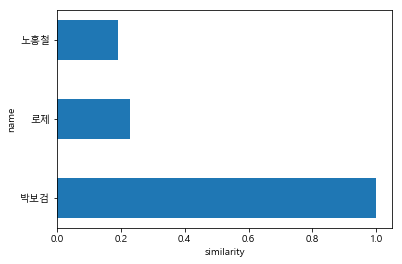

In [43]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

#한글 적용
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



soce = []
names = []
for i in tmp_list:
    soce.append(i[0])
    names.append(i[1])


pos = range(len(tmp_list))

plt.barh(pos,soce,height=0.5)
plt.yticks(pos,names)
plt.xlabel('similarity') #x축
plt.ylabel('name') #y축
plt.show()

유클리디안 거리공식은 특정사람의 점수기준이 극단적으로 너무 낮거나 높다면 제대로 된 결과를 도출해낼 수 없다. 이러한 문제점을 해결하기 위해서 상관분석을 이용한다.

* 상관분석  :

            두 변수간에 선형적 관계를 가지는지 분석하는 기법이다.

상관계수 r, X 와 Y가 함께 변하는 정도 /X와 Y가 각각 변하는 정도 

> r 값이 X,Y가 동일하면 +1 양의 상관관계  
> 반대방향으로 동일하면  -1으로 음의 상관관계

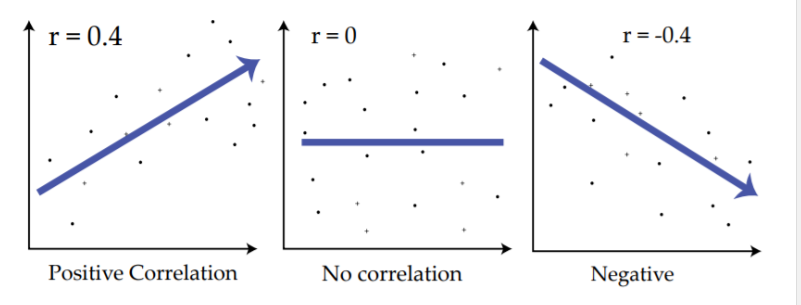



상관 계수의 종류

> - Pearson
     * 연속형 변수의 상관관계 측정
     * 많이 쓰임
- Kendall
     * 변수값 대신 순위로 바꿔서 이용 ex) 학교등급, 성적
     * 샘플크기가 작거나 데이터의 동률이 많을 경우 많이 쓰임
- Spearman
     * 변수값 대신 순위로 바꿔서 이용 ex) 학교등급, 성적
     * 편차와 에레에 민감하며, 보통으로 Kendall 상관계수보다 높은 값을 가진다.





In [94]:
critics = {
    '차현석': {
        '택시운전사': 2.5,
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        'The Night Listener': 3.0,
    },
    '황해도': {
        '택시운전사': 1.0,
        '남한산성': 4.5,
        '킹스맨:골든서클': 0.5,
        '범죄도시': 1.5,
        '아이 캔 스피크': 4.5,
        'The Night Listener': 5.0,
    },
    '김미희': {
        '택시운전사': 3.0,
        '남한산성': 3.5,
        '킹스맨:골든서클': 1.5,
        '범죄도시': 5.0,
        'The Night Listener': 3.0,
        '아이 캔 스피크': 3.5,
    },
    '김준형': {
        '택시운전사': 2.5,
        '남한산성': 3.0,
        '범죄도시': 3.5,
        'The Night Listener': 4.0,
    },
    '이은비': {
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        'The Night Listener': 4.5,
        '범죄도시': 4.0,
        '아이 캔 스피크': 2.5,
    },
    '임명진': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '킹스맨:골든서클': 2.0,
        '범죄도시': 3.0,
        'The Night Listener': 3.5,
        '아이 캔 스피크': 2.0,
    },
    '심수정': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        'The Night Listener': 3.0,
        '범죄도시': 5.0,
        '아이 캔 스피크': 3.5,
    },
    '박병관': {'남한산성': 4.5, '아이 캔 스피크': 1.0,
             '범죄도시': 4.0},

}


In [44]:
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14, 8)) # 크기 설정
    
    name1_x_y = []
    name2_x_y = []
    
    for i in data[name1]:
        # 같은 영화가 포홤된 경우만.
        if i in data[name2]:
            # 평점 넣기.
            name1_x_y.append(data[name1][i])
            name2_x_y.append(data[name2][i])
            # name1, name2 영화 폄정 좌표.
            plt.text(data[name1][i], data[name2][i],i)
    
    plt.plot(name1_x_y,name2_x_y,'ro')
    
    #  각 축의 크기 설정 (0 ~ 6)
    plt.axis([0,6,0,6])
    
    
    plt.xlabel(name1)
    plt.ylabel(name2)
    
    plt.show()
    
    
    
    

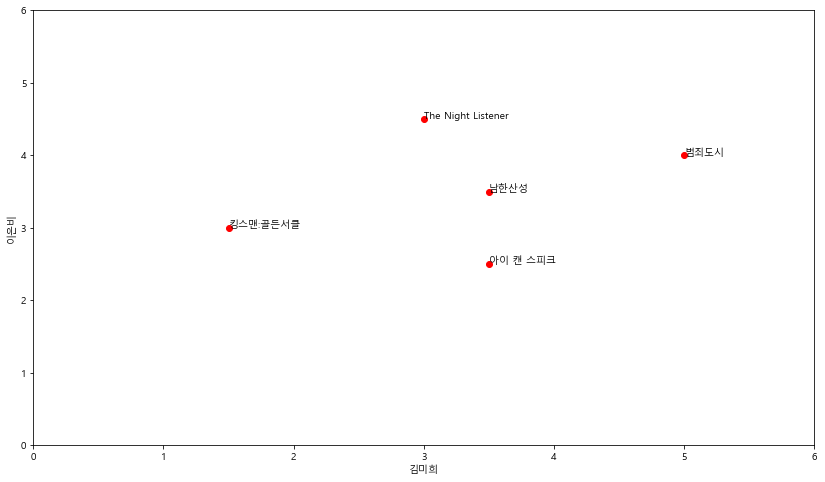

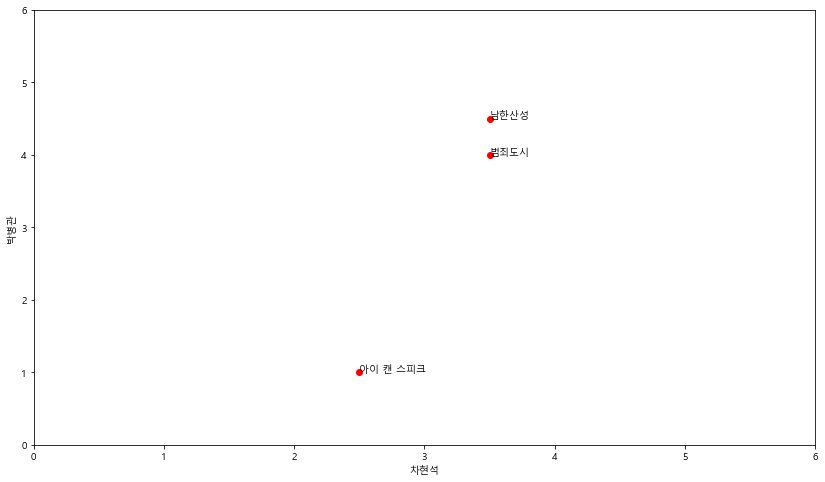

In [15]:
drawGraph(critics,"김미희", "이은비")
drawGraph(critics,'차현석','박병관')

피어슨 상관계수를 이용하여 상관계수값 출력.

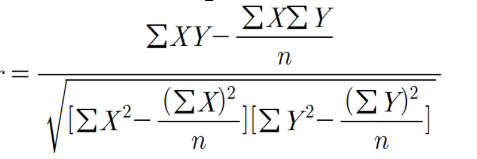

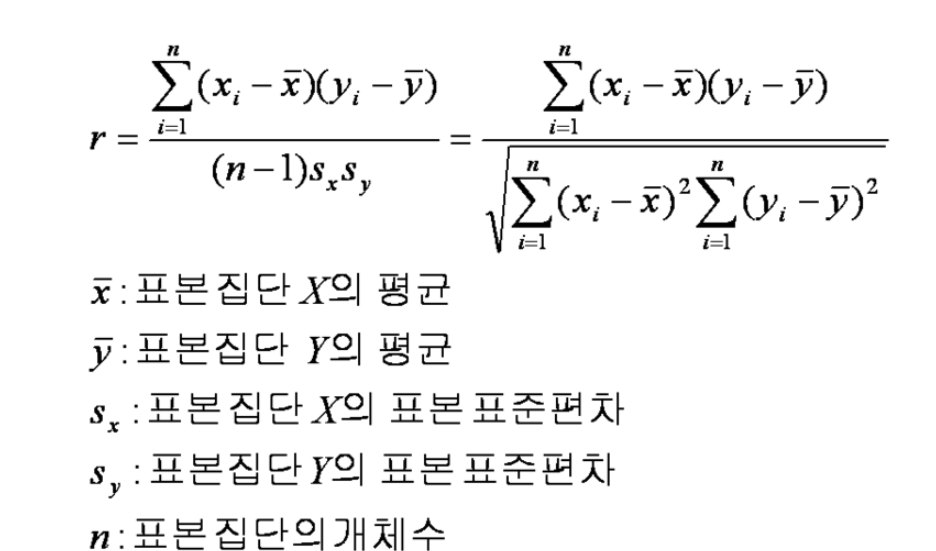

In [145]:
def sim_pearson(data, name1, name2):
    sumX = 0  #X의 합
    sumY = 0
    sumPowX = 0
    sumPowY = 0
    sumXY = 0
    count = 0

    for i in data[name1]:
        if i in data[name2]:
            sumX +=data[name1][i]
            sumY +=data[name2][i]
            sumPowX += pow(data[name1][i],2)
            sumPowY += pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count +=1
    
    try: 
        value = ( sumXY- ((sumX*sumY)/count) ) / sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))
        return   valueㅇ
    except:
        return   0
        
    
            


eturn ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

ZeroDivisionError: float division by zero

In [88]:
print(sim_pearson(critics,"김미희", "이은비"))
print(sim_pearson(critics,'차현석','박병관'))
print(sim_pearson(critics,'심수정','차현석'))

0.31497039417435607
0.9912407071619299
0.7470178808339965


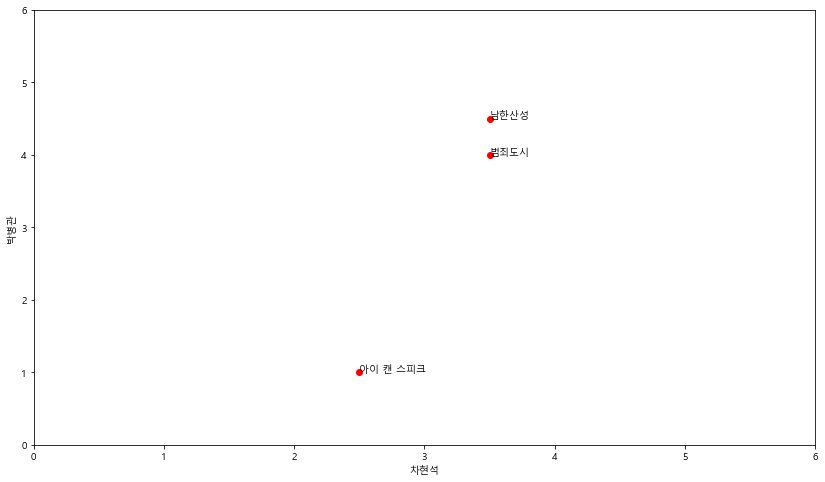

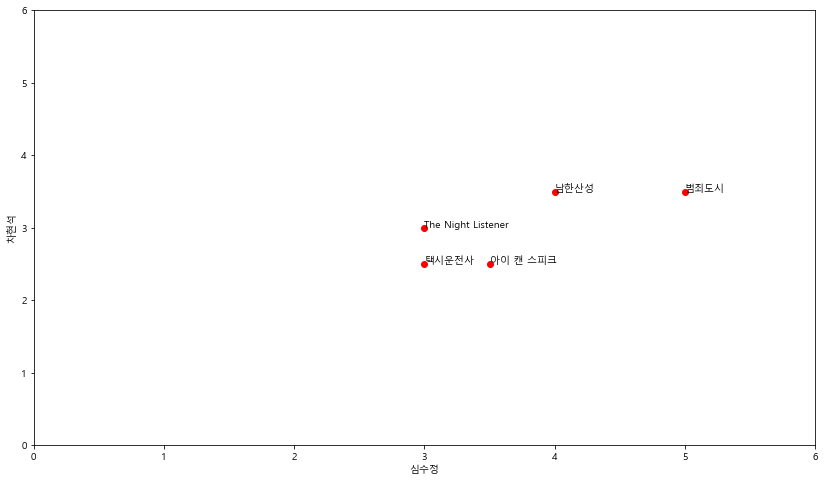

In [89]:
drawGraph(critics,'차현석','박병관')
drawGraph(critics,'심수정','차현석')

In [90]:

test = [8,7,6,5,4,2,3,1]
for i in range(7,0,-1):
    for  j in  range(0,i):
        if  test[j] > test[j+1]:
            test[j], test[j+1] = test[j+1],test[j]
            
print(test)

[1, 2, 3, 4, 5, 6, 7, 8]


In [91]:
def top_match(data, name, index=7, function=sim_pearson):
    
    match_list = [ (function(data,name,i),i) for i in data if name != i ]
    match_list.sort(reverse=True)
    
    #인덱스 지정.
    return match_list[:index]
    

#tmp_list = top_match(movie,"김재석")

In [133]:
#상관 계수가 높은 상위3명을 봅는다.
top_match(critics,"김재석",7)

[(1.0, '이은비'),
 (1.0, '심수정'),
 (1.0, '김준형'),
 (1.0, '김미희'),
 (0.0, '차현석'),
 (-1.0, '황해도'),
 (-1.0, '임명진')]

In [105]:
critics['김재석'] = {"사바하":9.0, "곡성":10.0, "가디언즈 오브 갤럭시": 8.3, "더킹":7.6,'남한산성':8.0,'범죄도시':9.0}
print(critics)

{'차현석': {'택시운전사': 2.5, '남한산성': 3.5, '킹스맨:골든서클': 3.0, '범죄도시': 3.5, '아이 캔 스피크': 2.5, 'The Night Listener': 3.0}, '황해도': {'택시운전사': 1.0, '남한산성': 4.5, '킹스맨:골든서클': 0.5, '범죄도시': 1.5, '아이 캔 스피크': 4.5, 'The Night Listener': 5.0}, '김미희': {'택시운전사': 3.0, '남한산성': 3.5, '킹스맨:골든서클': 1.5, '범죄도시': 5.0, 'The Night Listener': 3.0, '아이 캔 스피크': 3.5}, '김준형': {'택시운전사': 2.5, '남한산성': 3.0, '범죄도시': 3.5, 'The Night Listener': 4.0}, '이은비': {'남한산성': 3.5, '킹스맨:골든서클': 3.0, 'The Night Listener': 4.5, '범죄도시': 4.0, '아이 캔 스피크': 2.5}, '임명진': {'택시운전사': 3.0, '남한산성': 4.0, '킹스맨:골든서클': 2.0, '범죄도시': 3.0, 'The Night Listener': 3.5, '아이 캔 스피크': 2.0}, '심수정': {'택시운전사': 3.0, '남한산성': 4.0, 'The Night Listener': 3.0, '범죄도시': 5.0, '아이 캔 스피크': 3.5}, '박병관': {'남한산성': 4.5, '아이 캔 스피크': 1.0, '범죄도시': 4.0}, '김재석': {'사바하': 9.0, '곡성': 10.0, '가디언즈 오브 갤럭시': 8.3, '더킹': 7.6, '남한산성': 8.0, '범죄도시': 9.0}}


In [134]:
top_match(critics,"김재석",7)

[(1.0, '이은비'),
 (1.0, '심수정'),
 (1.0, '김준형'),
 (1.0, '김미희'),
 (0.0, '차현석'),
 (-1.0, '황해도'),
 (-1.0, '임명진')]

상관관계가 가장 높은 사람 하나만을 영화를 추천하고 예상평점을 구하는 것은 아니다.
유사값을 근거로 하되 일정 기준을 충족하는 사람이라면 모두 예상평점과 추천영화를 구하는 데 참고 할수 있게 한다.


1. 영화의 평점돠 유사도를 이용하여 추측평점 (유사도*(타인의)영화평점) 구한다. 
2. 추측의평점들을 총합을 구한다.
3. 추측평점 종합계/ 유사도 합계를 통해 모든 사람을 근거로 한 예상평점을 뽑아낸다.


In [135]:
def getRe(data, person, function=sim_pearson):
    # 유사도가 높은 사람들의 리스트
    result = top_match(data, person, len(data))

    simSum = 0
    score = 0
    li = []
    score_dic = {}
    sim_dic = {}

    for number, name in result:
        # 상관걔수가 음수인 경우는 배제한다.
        if number < 0:
            continue
        for movie in data[name]:
            # person이 안본 영화만
            if movie not in data[person]:
                # 영화평점 * 유사도
                score += number * data[name][movie]
                # 기본값 설정.
                score_dic.setdefault(movie, 0)
                score_dic[movie] += score

                # 조건에 맞는 사람의 유사도의 누적합을 구한다.
                sim_dic.setdefault(movie, 0)
                sim_dic[movie] += number

            score = 0

    for key in score_dic:
        # 평점 총합/ 유사도 총합.
        try:
            score_dic[key] = score_dic[key] / sim_dic[key]
            li.append((score_dic[key], key))
        except:
            continue
            
    li.sort(reverse=True)

    return li


In [137]:
getRe(critics,"심수정")

[(10.0, '곡성'),
 (9.0, '사바하'),
 (8.3, '가디언즈 오브 갤럭시'),
 (7.6, '더킹'),
 (2.1631780893913914, '킹스맨:골든서클')]

In [24]:
"""
Created on Mon Sep  9 12:22:44 2019

@author: khk37
"""
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common import exceptions
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import json
import re




In [25]:
class Setting(object):

    def __init__(self):
        self.__options = webdriver.ChromeOptions()
        self.__options.add_argument('headless')
        self.__options.add_argument('window-size=1920x1080')
        self.__options.add_argument('--disable-gpu')
        self.__options.add_argument("lang=ko_KR")  # 한국어!
        self.__options.add_argument(
            "user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")
    
        
        self.__dirver = ""
        # dirver가 없는 경우.
        try:
            self.__driver = webdriver.Chrome('C:/Users/khk37/Downloads/chromedriver_win32 (2)/chromedriver',chrome_options=self.__options)
        except :
            print("드라이브를 설치하거나 경로를 다시 설정 해주세요")
            #self.check_chrome_version()
            
            
    def get_driver(self):
      
        return self.__driver

In [26]:
class Crawling(object):

    def __init__(self):
       
        #설정된 크롬드라이브 가져오기.
        self.__driver = Setting().get_driver()
        self.url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&page={}'
        
    def start(self):
        
        page = 1
        movies = {}

        while  page < 1001:
            self.__driver.get(self.url.format(str(page)))
            #print(self.__driver.page_source)
            #movie_title = self.__driver.find_element_by_css_selector('.tit5')

            #영화 이름
            movie_title = self.__driver.find_elements_by_xpath('//*[@id="old_content"]/table/tbody/tr/td/div/a')
            #영화 평점
            movie_score = self.__driver.find_elements_by_xpath('//*[@id="old_content"]/table/tbody/tr/td[4]')



            
            for  title, score in zip(movie_title, movie_score):
                    movies.setdefault(title.get_attribute('title'),0)
                    movies[title.get_attribute('title')] = score.text
            page +=1


    
        
        #json 파일 저장.
        with open('movie_josn.json','w' , encoding='utf-8') as file:
                json.dump(movies,file,ensure_ascii=False, indent="\t")
        
        
        #//*[@id="old_content"]/table/tbody/tr[3]/td[2]/div/a
        

In [27]:
Crawling().start()

C:\Users\khk37\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: use options instead of chrome_options
  app.launch_new_instance()


1. 영화와 평점을 수집
2. 이 리스트를 랜덤하게 20개씩 분활하여 넣는다.
3. 모두것을 랜덤으로 한다.


In [28]:
with open('movie_josn.json','r' , encoding='utf-8') as file:
    movie_list = json.load(file)
import random

#리스트로 변환
keys = list(map(str,movie_list.keys()))
#랜덤으로 바꾸기.
random.shuffle(keys)
movie_list= [(key,movie_list[key]) for key in keys ]

print(len(movie_list))

1984


 {
    '차현석': {
        '택시운전사': 2.5,
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        'The Night Listener': 3.0,
    },

In [120]:
tmp_list = {}

#print(movie_list[0:10])



for i in range(0,len(movie_list)):
    front = random.randint(0,1983)
    end = random.randint(1,1983)
    
    tmp_list.setdefault(i,dict)
    tmp2_list = {}
    for title, score in movie_list[front:end]:
        tmp2_list[title] = float(score)

    tmp_list[i] = tmp2_list

tmp_list[1]    

{'짱구는 못말려 극장판 : 태풍을 부르는 황금 스파이 대작전': 8.28,
 '퍼펙트 블루': 8.71,
 '끝까지 간다': 9.0,
 '이번 일요일에': 8.8,
 '인어 공주': 8.89,
 '행복 목욕탕': 8.44,
 '코어': 8.24,
 '치킨 런': 8.66,
 '컨스피러시': 8.49,
 '발레리나': 8.53,
 '재심': 8.5,
 '에너미 앳 더 게이트': 9.01,
 '아이 필 프리티': 8.59,
 '마음이...': 8.96,
 '마이클 잭슨의 디스 이즈 잇': 9.26,
 '비비안 마이어를 찾아서': 8.34,
 '붉은 가족': 8.16,
 '블러드 다이아몬드': 9.12,
 '매디슨 카운티의 다리': 8.88,
 '더 라스트: 나루토 더 무비': 8.69,
 '스탈린그라드: 최후의 전투': 8.49,
 '미이라': 9.2,
 '아더 크리스마스': 8.72,
 '팅커 테일러 솔저 스파이': 8.19,
 '하이큐!! 끝과 시작': 8.9,
 '버틀러: 대통령의 집사': 8.56,
 '아이 엠 샘': 9.32,
 '내부자들': 8.99,
 '살아남은 아이': 8.2,
 '언브로큰': 8.37,
 '슈렉': 8.87,
 '레이디 버드': 8.47,
 '동사서독': 8.64,
 '개구쟁이 스머프': 8.53,
 '벤허': 8.26,
 '오! 브라더스': 8.22,
 '룸': 8.95,
 'K-19 위도우메이커': 9.0,
 '사랑은 너무 복잡해': 8.62,
 '의천도룡기': 8.72,
 '스타워즈 에피소드 6 - 제다이의 귀환': 8.97,
 '딥 블루 씨': 8.71,
 '라스트 나잇': 8.09,
 '극장판 공룡메카드: 타이니소어의 섬': 9.14,
 '갓파 쿠와 여름방학을': 9.23,
 '매드맥스: 분노의 도로': 8.77,
 '인생 후르츠': 9.02,
 '이탈리안 잡': 8.49,
 '해가 서쪽에서 뜬다면': 8.58,
 '아티스트': 8.72,
 '철콘 근크리트': 8.21,
 '겨울왕국': 9.12,
 '명량': 8.44,


In [158]:
tmp_list['김재석'] = {"사바하":9.0, "곡성":10.0, "가디언즈 오브 갤럭시": 8.3, "더킹":7.6,'남한산성':8.0,'범죄도시':9.0, '당신, 거기 있어줄래요': 9.0,"그린 북":7.0}

In [159]:
for score, title in getRe(tmp_list,'김재석'):
    
    if 9.5 <= score:
        print(title)
        


가버나움
베일리 어게인
주전장
